In [39]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Load Image via video Capture or from storage

In [ ]:
# Load image
img_bgr = cv2.imread("images/ball_on_plate_2.png")

# Show Image
plt.imshow(img_bgr)
plt.show()

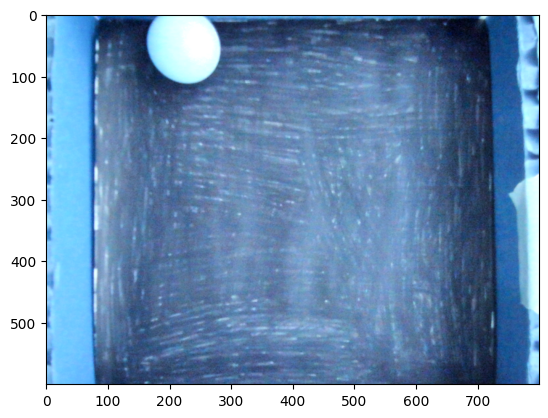

In [40]:
# Get Image from open cvs video capture
camera_index=0
frame_width=800
frame_height=600
cap = cv2.VideoCapture(camera_index, cv2.CAP_V4L2)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, frame_width)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, frame_height)

# Get some frame until a frame with no black content is created
i = 0
while i < 10:
    success, img_bgr = cap.read()
    i+=1
cap.release()

# Show Image
plt.imshow(img_bgr)
plt.show()

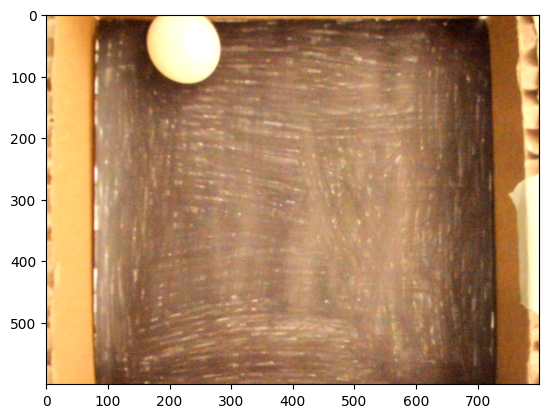

In [41]:
# Convert from bgr channel to rgb (a matplot problem)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# Show Image
plt.imshow(img_rgb)
plt.show()

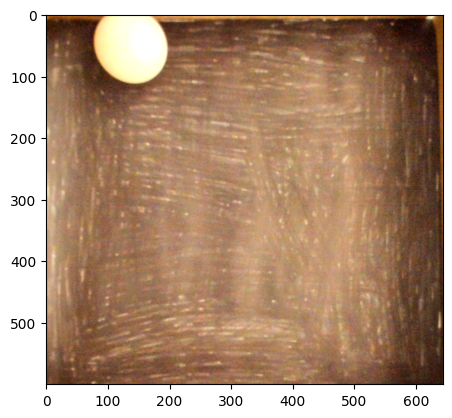

In [42]:
# Crop image
crop_top, crop_left = 0, 86
crop_bottom, crop_right = 0, 70
img_rgb = img_rgb[crop_top:img_rgb.shape[0] - crop_bottom, crop_left:img_rgb.shape[1] - crop_right]

# Show Image
plt.imshow(img_rgb)
plt.show()

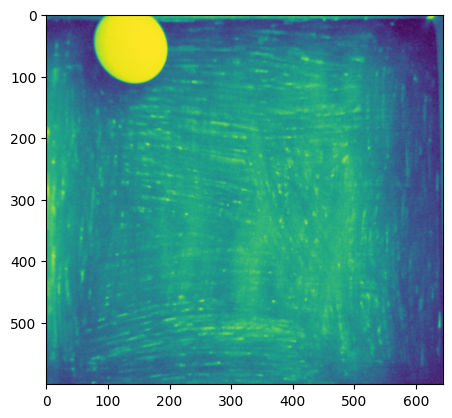

In [43]:
# Convert image from rgb (multi (3) channels) to  gray (single channel)
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

# Show Image
plt.imshow(img_gray)
plt.show()

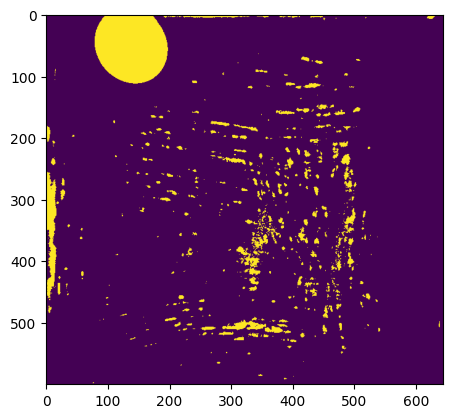

In [44]:
#Filter Image and get the maxium of low and high
_, tresh = cv2.threshold(img_gray, 170, 255, cv2.THRESH_BINARY)

# Show Image
plt.imshow(tresh)
plt.show()

In [45]:
# Get all contours in the image
contours, _ = cv2.findContours(tresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(f"contours: {len(contours)}")

contours: 590


area: 10799.0
center: (136, 51)
radius: 63


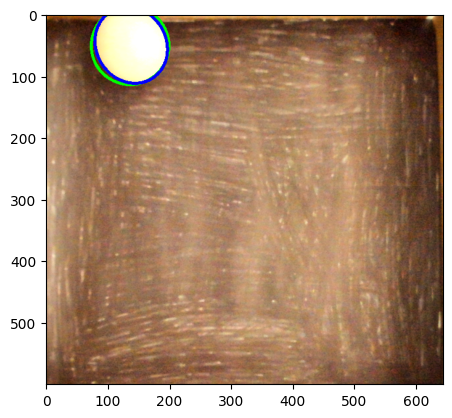

In [46]:
# To prevent manipulating the origin image, make a copy of it
img_rgb_copy = img_rgb.copy()

# Continous if at least one contour exist
if contours:
    # Get the largest contour
    largest_contour = max(contours, key=cv2.contourArea)

    # Get the area of this contour
    area = cv2.contourArea(largest_contour)
    print(f"area: {area}")

    # Exract exact middle x and y position and radius of the contour
    (x,y), radius = cv2.minEnclosingCircle(largest_contour)

    # Becouse features are type of float, convert it to int
    center = (int(x), int(y))
    radius = int(radius)

    print(f"center: {center}")
    print(f"radius: {radius}")

    # Draw circle around this coutour
    cv2.circle(img_rgb_copy, center, radius, (0, 255, 0), 4)

    # Fit a ellipse around this contour
    ellipse = cv2.fitEllipse(largest_contour)

    # Draw ellipse around this contour
    cv2.ellipse(img_rgb_copy, ellipse, (0, 0, 255), 4)

# Show image
plt.imshow(img_rgb_copy)
plt.show()